In [1]:
import tensorflow as tf
import keras
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.utils import to_categorical
import os
from tqdm import tqdm
import cv2
import random
import pickle as pk
from sklearn.model_selection import train_test_split

In [2]:
mydataset='D:\jupyter\Datasets\cats & dogs'
print(os.listdir(mydataset))

['test', 'train']


# Constants

In [3]:
FAST_RUN = False
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Handle files and Directory

In [4]:
trainfolder=os.path.join(mydataset,'train')
filenames=os.listdir(trainfolder)
print(filenames)

['cats', 'dogs']


In [5]:
categories=['cats','dogs'] 
training =[]
classnames={0:'cats',1:'dogs'}

In [6]:
for category in categories:
    x=0
    
    folder=os.path.join(trainfolder,category)
    for file in tqdm( os.listdir(folder)):
        try:
            img=cv2.imread(os.path.join(folder,file))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img=cv2.resize(img,IMAGE_SIZE)# size image for CNN input
            classNum=categories.index(category) #detrmine class
            training.append([img,classNum])
            # plt.imshow(img)
            # plt.show()
        except Exception as e:
            pass
        # x+=1
        # if x==2:
        #     break

100%|████████████████████████████████████████████████████████████████████████████████| 328/328 [00:04<00:00, 78.37it/s]


In [7]:
training [:][0]

[array([[[ 92, 140, 155],
         [110, 144, 160],
         [118, 147, 158],
         ...,
         [ 71, 140, 147],
         [ 78, 142, 154],
         [ 82, 146, 158]],
 
        [[ 89, 137, 152],
         [100, 139, 155],
         [107, 141, 154],
         ...,
         [ 69, 137, 148],
         [ 75, 139, 151],
         [ 80, 143, 155]],
 
        [[ 89, 140, 151],
         [ 96, 139, 154],
         [ 98, 141, 157],
         ...,
         [ 73, 139, 153],
         [ 76, 140, 152],
         [ 80, 144, 156]],
 
        ...,
 
        [[ 52,  42,  34],
         [ 52,  43,  34],
         [ 56,  46,  37],
         ...,
         [ 65,  40,  37],
         [ 58,  43,  41],
         [ 59,  44,  41]],
 
        [[ 93,  86,  76],
         [ 94,  86,  76],
         [ 96,  88,  78],
         ...,
         [ 66,  45,  38],
         [ 63,  48,  45],
         [ 63,  48,  45]],
 
        [[ 42,  44,  41],
         [ 38,  40,  37],
         [ 36,  38,  35],
         ...,
         [ 59,  50,  45],
  

In [8]:
random.shuffle(training)
for trainSample in training[:10]:
    print(trainSample[1])
    
# image_classes = [item[1] for item in training]
# image_classes

1
0
0
1
1
1
0
1
1
0


In [9]:
x_train_data=[]
y_train_data=[]
for feature,label in training:
    x_train_data.append(feature)
    y_train_data.append(label)
    

In [10]:
x_train_data=np.array(x_train_data)
y_train_data=np.array(y_train_data)

In [11]:
x_train_data=x_train_data.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)
# print(x_train_data[0])
print(x_train_data.shape)
# print(y_train_data[:10])
print(y_train_data.shape)

(657, 150, 150, 3)
(657,)


# save x , y for use withou load images

In [12]:
pickle_out=open('X_train.pickle','wb')# write binary
pk.dump(x_train_data,pickle_out) #save x train in binary in file X.pickle
pickle_out.close()

pickle_out=open('Y_train.pickle','wb')
pk.dump(y_train_data,pickle_out)#save y train in binary in file Y.pickle
pickle_out.close()


In [13]:
pickle_in=open('X_train.pickle','rb')# write binary
x_train=pk.load(pickle_in) #save x train in binary in file X.pickle
pickle_in.close()

pickle_in=open('Y_train.pickle','rb')
y_train=pk.load(pickle_in)#save y train in binary in file Y.pickle
pickle_in.close()


In [14]:
print(x_train.shape)
print(y_train.shape)

(657, 150, 150, 3)
(657,)


# test data

In [15]:
testfolder=os.path.join(mydataset,'test')
testfilenames=os.listdir(testfolder)
print(testfilenames)

['cats', 'dogs']


In [16]:
test=[]

In [17]:
for category in categories:
    x=0
    
    folder=os.path.join(testfolder,category)
    for file in tqdm( os.listdir(folder)):
        try:
            img_test=cv2.imread(os.path.join(folder,file))
            img_test=cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB)
            img_test=cv2.resize(img_test,IMAGE_SIZE)# size image for CNN input
            classNum=categories.index(category) #detrmine class
            test.append([img_test,classNum])
            # plt.imshow(img)
            # plt.show()
        except Exception as e:
            pass
        # x+=1
        # if x==2:
        #     break

100%|█████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 136.53it/s]


In [18]:
random.shuffle(test)
for trainSample in test[:10]:
    print(trainSample[1])
    
# image_classes = [item[1] for item in training]
# image_classes

1
1
0
0
0
0
1
0
0
0


In [19]:
x_test_data=[]
y_test_data=[]
for feature,label in test:
    x_test_data.append(feature)
    y_test_data.append(label)
    

In [20]:
x_test_data=np.array(x_test_data)
y_test_data=np.array(y_test_data)

In [21]:
x_test_data=x_test_data.reshape(-1,IMAGE_HEIGHT,IMAGE_WIDTH,IMAGE_CHANNELS)
# print(x_train_data[0])
print(x_test_data.shape)
# print(y_train_data[:10])
print(y_test_data.shape)

(40, 150, 150, 3)
(40,)


In [22]:
y_test_data

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0])

In [23]:
# for a in x_test_data:
#     plt.imshow(a)
#     plt.show()

# save x , y for use withou load images

In [24]:
pickle_out=open('X_test.pickle','wb')# write binary
pk.dump(x_test_data,pickle_out) #save x train in binary in file X.pickle
pickle_out.close()

pickle_out=open('Y_test.pickle','wb')
pk.dump(y_test_data,pickle_out)#save y train in binary in file Y.pickle
pickle_out.close()


In [25]:
pickle_in=open('X_test.pickle','rb')# write binary
x_test=pk.load(pickle_in) #save x train in binary in file X.pickle
pickle_in.close()

pickle_in=open('Y_test.pickle','rb')
y_test=pk.load(pickle_in)#save y train in binary in file Y.pickle
pickle_in.close()


In [26]:
print(x_test.shape)
print(y_test.shape)

(40, 150, 150, 3)
(40,)


In [27]:
# x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=36)
# print(x_train.shape)
# print(y_train.shape)

# print(x_test.shape)
# print(y_test.shape)
# y_train

# one-hot encoded

In [28]:
y_train=to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train.shape)
print(y_test.shape)

(657, 2)
(40, 2)


# normalization 

In [29]:
x_train=x_train.astype('float')
x_test=x_test.astype('float')

x_train=x_train/255.0
x_test=x_test/255.0

In [30]:
y_train[0]

array([0., 1.], dtype=float32)

# Build Model

In [31]:
model=keras.models.Sequential()

In [32]:
model.add(Conv2D(32,(3,3),input_shape=(IMAGE_WIDTH,IMAGE_HEIGHT,IMAGE_CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

In [33]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [34]:
y_train[:15]
num_classes = len(np.unique(y_train))
print(num_classes)


2


In [35]:
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
21/21 [==============================] - 13s 586ms/step - loss: 1.0770 - accuracy: 0.5266
Epoch 2/3
21/21 [==============================] - 11s 542ms/step - loss: 0.6942 - accuracy: 0.5205
Epoch 3/3
21/21 [==============================] - 11s 546ms/step - loss: 0.6897 - accuracy: 0.5723


In [36]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

2/2 [==============================] - 0s 42ms/step - loss: 0.6912 - accuracy: 0.5250
0.6911694407463074
0.5249999761581421


In [37]:
testimgnum=16
predicted=model.predict(np.array([x_test[testimgnum]]))
print(predicted.shape)
predicted 

1/1 [==============================] - 0s 365ms/step
(1, 2)


array([[0.50900346, 0.49099654]], dtype=float32)

In [38]:
predictedClass=np.argmax(predicted[0])
print( f'predicted Class {predictedClass}')
print( f'actual class {y_test[testimgnum] }')
x_test.shape

predicted Class 0
actual class [0. 1.]


(40, 150, 150, 3)

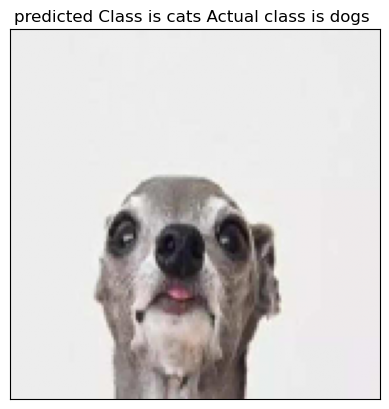

In [39]:
actual=np.argmax(y_test[testimgnum])
plt.imshow(x_test[testimgnum],cmap='gray')
plt.title(f'predicted Class is {classnames[predictedClass]} Actual class is {classnames[actual]} ')
plt.xticks([])
plt.yticks([])
plt.show()